# Linear Regression

## Home Assignment - Stock Prices Prediction

The stocks.csv file contains stock prices for 4 months. There is one input variable(input) & one target variable(price). We have to perform linear regression on these prices to predict future prices. 
Observe the data in the columns 'input' and 'date'. The input is odd in number, and dates are too. 

Perform regression analysis on the data, and answer the following questions.

#### 1. Plot a scatter plot of input vs price. The xticks on the graph should contain dates in vertical position. 
#### 2. Calculate mean and standard deviation of price. Find out outliers(value greater than 1.5 standard deviations) in your data. List them down. 
#### 3. Filter out rows in your dataset, whose price is greater than 1.5 standard deviations. Plot a scatter of input vs price, with outliers in a different color.
#### 4. Now split your data in Test & Training input. Perform a 75:25 split, i.e first 3 month data is training set, and last 1 month data is test. Perform linear regression on the training data. Plot the line on a graph along with a scatter of input and price of the training dataset. 
#### 5. Predict the prices using the test dataset. Plot a scatter of test price vs obtained price. Find the MSE, R^2 score of the predicted prices. 
#### 6. Now split your data with a 75:25 ratio using the train_test_split function. Perform steps 5 & 6 over this split and compare your answers. 
#### 7. On the entire dataset, perform K Fold cross validation where k goes from 3-10. Print the average accuracy obtained for each value of k. 

In [3]:
import pandas as pd
df = pd.read_csv('stocks.csv')
df.head()
# df

,input,date,price
0,1,01-01-2010,99.722049
1,3,03-01-2010,109.727295
2,5,05-01-2010,110.343276
3,7,07-01-2010,92.669619
4,9,09-01-2010,105.517622


### 1. Plot a scatter plot of input vs price. The xticks on the graph should contain dates in vertical position.

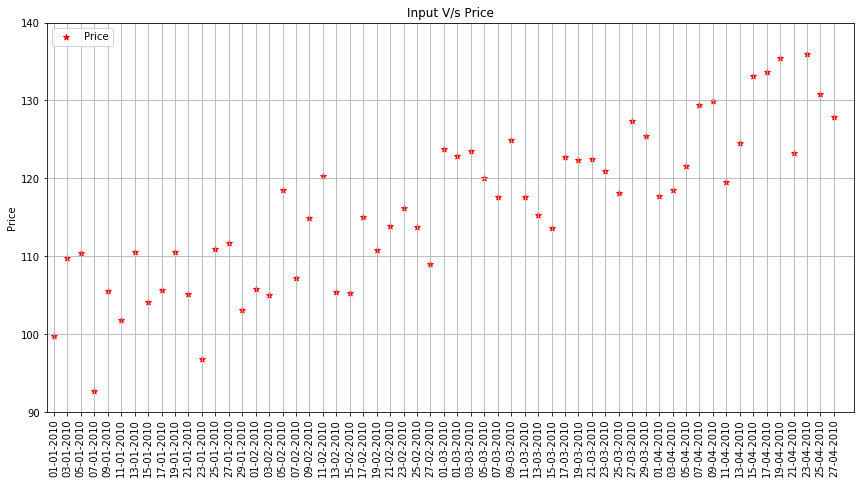

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=[12,6])
plt.scatter(df['input'],df['price'],color="r",marker="*",label="Price")
plt.grid(True)
plt.axis([0,120,90,140])
plt.tight_layout()
#plt.xlabel("Input")
plt.title("Input V/s Price")
plt.ylabel("Price")
plt.xticks(df['input'],df['date'], rotation='vertical')
plt.legend(loc=2)


### 2. Calculate mean and standard deviation of price. Find out outliers(value greater than 1.5 standard deviations) in your data. List them down

In [5]:
print("Mean price is:{0}".format(df['price'].mean()))
std=df['Standard_Deviation']=df['price'].std()
print("Standard Deviation is:{0}".format(df['price'].std()))

data_new=df[df['price'][::]-df['price'][1::]>std*1.5]
print(data_new)

Mean price is:116.25788066067796
Standard Deviation is:9.98024934696637
Empty DataFrame
Columns: [input, date, price, Standard_Deviation]
Index: []


### 3. Filter out rows in your dataset, whose price is greater than 1.5 standard deviations. Plot a scatter of input vs price, with outliers in a different color.

 - There is no outlier in the dataset

### 4. Now split your data in Test & Training input. Perform a 75:25 split, i.e first 3 month data is training set, and last 1 month data is test. Perform linear regression on the training data. Plot the line on a graph along with a scatter of input and price of the training dataset.

Slope(m) is 0.25 and Intercept is101.98


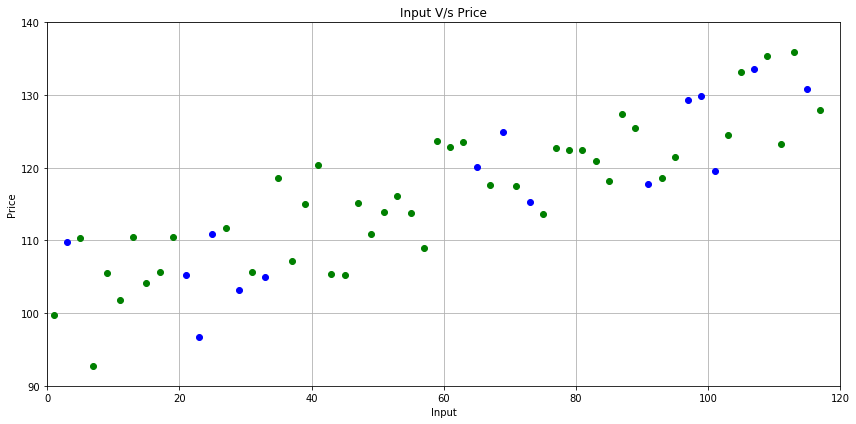

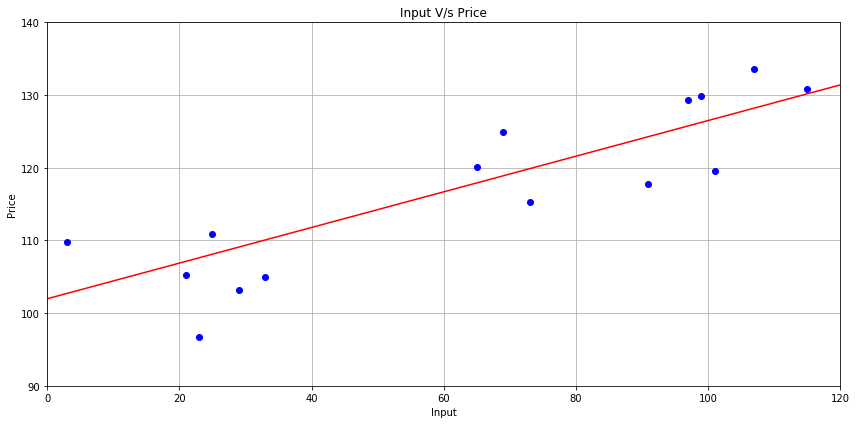

In [6]:
from sklearn.model_selection import train_test_split

X=df['input']
Y=df['price']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25)

x_train=X_train.values.reshape(-1,1)
y_train=Y_train.values.reshape(-1,1)
x_test=X_test.values.reshape(-1,1)
y_test=Y_test.values.reshape(-1,1)

from sklearn.linear_model import LinearRegression
#create and fit the model
model = LinearRegression()
model.fit(x_train,y_train)

# print(y_test) #Actual Output
# print(model.predict(x_test)) #PREDICTED OUTPUT

plt.figure(figsize=[12,6])
plt.xlabel("Input")
plt.title("Input V/s Price")
plt.ylabel("Price")
plt.plot(x_train,y_train,'go')
plt.plot(x_test,y_test,'bo')
plt.axis([0,120,90,140])
plt.grid(True)
plt.tight_layout()

#plot regression solution line

plt.figure(figsize=[12,6])
plt.xlabel("Input")
plt.title("Input V/s Price")
plt.ylabel("Price")
#plt.plot(x_train,y_train,'go')
plt.plot(x_test,y_test,'bo')
plt.axis([0,120,90,140])
plt.grid(True)
plt.tight_layout()

plt.plot([0,120],[model.predict([[0]])[0][0],model.predict([[120]])[0][0]], color= 'r')
print("Slope(m) is %.2f and Intercept is%.2f"%(model.coef_, model.intercept_)) 

# 5. Predict the prices using the test dataset. Plot a scatter of test price vs obtained price. Find the MSE, R^2 score of the predicted prices. 


[[125.75477995]
 [108.10601473]
 [126.24502343]
 [128.20599734]
 [118.89137125]
 [110.06698864]
 [107.61577125]
 [102.71333647]
 [117.9108843 ]
 [124.28404951]
 [126.73526691]
 [109.08650169]
 [130.16697126]
 [119.87185821]
 [107.12552777]]
[[133.68946453]
 [129.16986576]
 [133.81770055]
 [134.73236402]
 [132.60439033]
 [127.71773903]
 [125.69140828]
 [128.87451668]
 [131.41220883]
 [130.83406367]
 [131.2780929 ]
 [127.25923494]
 [134.03378554]
 [130.24999793]
 [127.76445083]]
0.7540942252520344
MSE IS 30.20495644688127


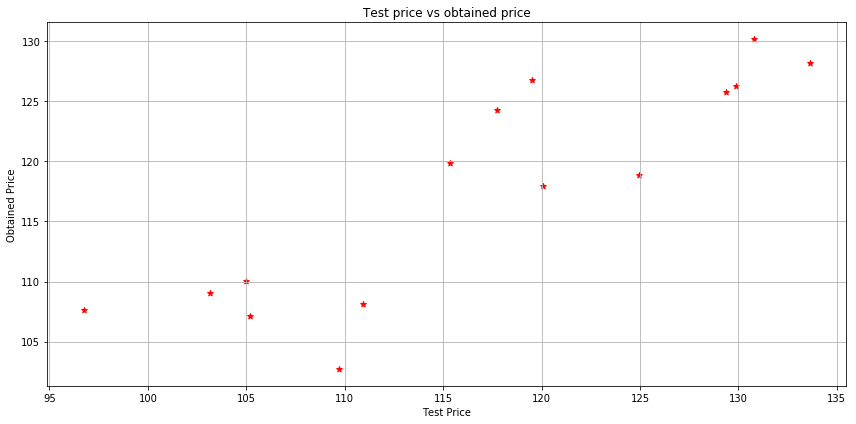

In [7]:
#Q5a
print(model.predict(x_test))
print(model.predict(y_test))

#Q5c
print(model.score(x_test,y_test)) #r^2 coefficent
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, model.predict(x_test), multioutput = 'uniform_average')
print("MSE IS",mse )

#Q5b
plt.figure(figsize=[12,6])
plt.scatter(y_test,model.predict(x_test),color="r",marker="*")
plt.grid(True)
plt.xlabel("Test Price")
plt.title("Test price vs obtained price")
plt.ylabel("Obtained Price")
# plt.axis([0,120,90,140])
plt.tight_layout()

# 6. Now split your data with a 80:20 ratio using the train_test_split function. Perform steps 4 & 5 over this split and compare your answers. 


Slope(m) is 0.23 and Intercept is103.04
[[128.31592358]
 [115.7917946 ]
 [118.57493438]
 [117.64722112]
 [109.76165843]
 [105.58694877]
 [119.96650426]
 [103.26766563]
 [126.46049707]
 [104.65923551]
 [125.99664044]
 [125.06892718]]
[[134.44638958]
 [129.40831673]
 [130.3184574 ]
 [131.68134216]
 [126.95626307]
 [126.63710401]
 [129.78605132]
 [126.16410412]
 [130.75881014]
 [124.52844584]
 [133.16172603]
 [131.21932273]]
0.7799825773216312
MSE IS 33.52318885525158


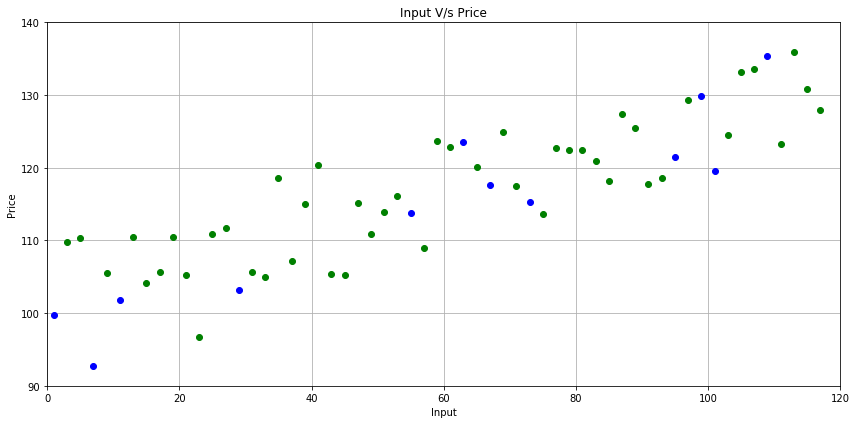

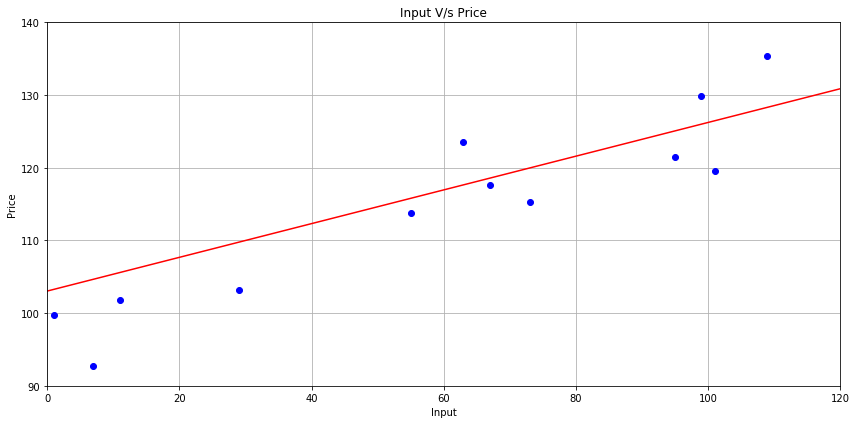

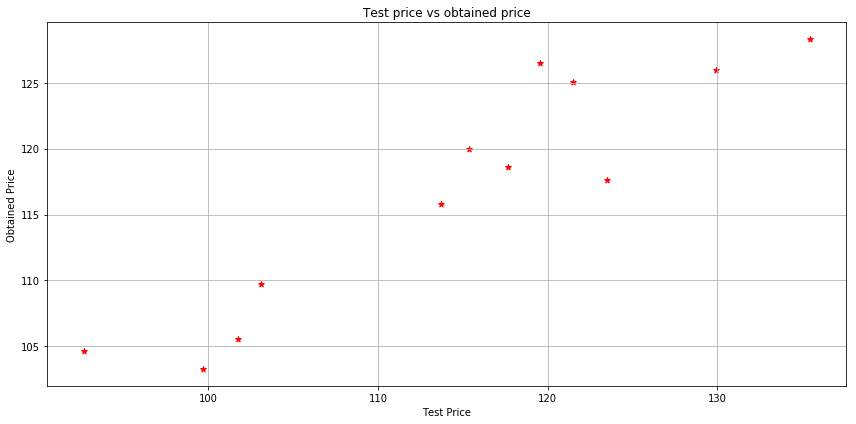

In [8]:
from sklearn.model_selection import train_test_split

X=df['input']
Y=df['price']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

x_train=X_train.values.reshape(-1,1)
y_train=Y_train.values.reshape(-1,1)
x_test=X_test.values.reshape(-1,1)
y_test=Y_test.values.reshape(-1,1)

from sklearn.linear_model import LinearRegression
#create and fit the model
model = LinearRegression()
model.fit(x_train,y_train)

# print(y_test) #Actual Output
# print(model.predict(x_test)) #PREDICTED OUTPUT

plt.figure(figsize=[12,6])
plt.xlabel("Input")
plt.title("Input V/s Price")
plt.ylabel("Price")
plt.plot(x_train,y_train,'go')
plt.plot(x_test,y_test,'bo')
plt.axis([0,120,90,140])
plt.grid(True)
plt.tight_layout()

#plot regression solution line

plt.figure(figsize=[12,6])
plt.xlabel("Input")
plt.title("Input V/s Price")
plt.ylabel("Price")
#plt.plot(x_train,y_train,'go')
plt.plot(x_test,y_test,'bo')
plt.axis([0,120,90,140])
plt.grid(True)
plt.tight_layout()

plt.plot([0,120],[model.predict([[0]])[0][0],model.predict([[120]])[0][0]], color= 'r')
print("Slope(m) is %.2f and Intercept is%.2f"%(model.coef_, model.intercept_)) 






#Q5a
print(model.predict(x_test))
print(model.predict(y_test))

#Q5c
print(model.score(x_test,y_test)) #r^2 coefficent
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, model.predict(x_test), multioutput = 'uniform_average')
print("MSE IS",mse )

#Q5b
plt.figure(figsize=[12,6])
plt.scatter(y_test,model.predict(x_test),color="r",marker="*")
plt.grid(True)
plt.xlabel("Test Price")
plt.title("Test price vs obtained price")
plt.ylabel("Obtained Price")
# plt.axis([0,120,90,140])
plt.tight_layout()

# 7. On the entire dataset, perform K Fold cross validation where k goes from 3-10. Print the average accuracy obtained for each value of k. 

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
for i in range(3,11):
    scores = cross_val_score(model,df['input'].values.reshape(-1,1),df['price'].values.reshape(-1,1), cv=i)
    print("Cross-valinated scores:",scores)
    print("Accuracy: %0.2f (+/- %0.2f)"%(scores.mean(),scores.std()*2)) 

Cross-valinated scores: [0.15397105 0.28383308 0.36530456]
Accuracy: 0.27 (+/- 0.17)
Cross-valinated scores: [-0.0119183   0.14581173 -0.14226966  0.29878648]
Accuracy: 0.07 (+/- 0.33)
Cross-valinated scores: [-0.10303747  0.02721154  0.1947893  -0.49526123 -0.1876169 ]
Accuracy: -0.11 (+/- 0.46)
Cross-valinated scores: [-0.08727052  0.12107373  0.07687873 -0.49030289  0.09589154  0.07209612]
Accuracy: -0.04 (+/- 0.43)
Cross-valinated scores: [-0.06352265  0.0532161   0.01427428 -0.07941022 -0.26455556 -0.21567559
 -0.39365852]
Accuracy: -0.14 (+/- 0.30)
Cross-valinated scores: [-0.06463562 -0.20854131 -0.02945115  0.20598365 -0.45503286  0.07637965
 -0.47883145 -0.89273007]
Accuracy: -0.23 (+/- 0.67)
Cross-valinated scores: [-0.06769439  0.06691853  0.2120898  -0.08397851 -0.29529819  0.06834661
 -0.63003932  0.0851553  -0.44518346]
Accuracy: -0.12 (+/- 0.53)
Cross-valinated scores: [-0.07249248 -0.28825933  0.03399844 -0.04946416  0.13315053 -1.7779341
  0.08031899 -0.86432773 -0.044